In [48]:
import pandas as pd
import numpy as np
from docx import Document

def read_docx(file_path):
    # Open the .docx file
    doc = Document(file_path)
    
    # Read and print each paragraph in the document
    for paragraph in doc.paragraphs:
        print(paragraph.text)
        
read_docx('./SuperProcure.docx')

SuperProcure


Instructions : 
Read the instructions carefully.
Questions are divided into two parts (A & B)
Respond to a minimum of three questions, with the flexibility to answer more.
Choose at least two questions from Part A and at least one from Part B.
Objective of this task is to understand your ability to analyse datasets and being able to articulate your findings in a meaningful, actionable way.


PART -A

Is there a noticeable correlation between specific customers and suppliers, and if so, how does this relationship manifest in terms of trip performance metrics?

Based on the analysis of dataset given, can you develop a forecast for demand pattern, over the next 3 months?

Explore the dataset for any unusual patterns or outliers in trip data. How would you approach identifying and handling outliers, and what potential impact might they have on the analysis?



PART -B

What are the key factors influencing demand patterns, and how have they evolved over the analyzed period?



In [49]:
data = pd.read_excel('./SuperProcure.xlsx')

Exploratory Data Analysis

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         5927 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

In [51]:
display(data.columns)

Index(['GpsProvider', 'BookingID', 'Market/Regular ', 'BookingID_Date',
       'vehicle_no', 'Origin_Location', 'Destination_Location', 'Org_lat_lon',
       'Des_lat_lon', 'Data_Ping_time', 'Planned_ETA', 'Current_Location',
       'DestinationLocation', 'actual_eta', 'Curr_lat', 'Curr_lon', 'ontime',
       'delay', 'OriginLocation_Code', 'DestinationLocation_Code',
       'trip_start_date', 'trip_end_date', 'TRANSPORTATION_DISTANCE_IN_KM',
       'vehicleType', 'Minimum_kms_to_be_covered_in_a_day', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'customerNameCode', 'supplierID',
       'supplierNameCode', 'Material Shipped'],
      dtype='object')

In [52]:
import pandas as pd
df = data.copy()
df.loc[:,'trip_start_date'] = pd.to_datetime(df['trip_start_date'])
df.loc[:,'trip_end_date'] = pd.to_datetime(df['trip_end_date'])


In [53]:
df.head(5)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,320.0,NaN,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,103.0,NaN,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,300.0,NaN,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,61.0,NaN,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,240.0,NaN,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


In [54]:
df[df.columns[9:21]].head(5)

,Data_Ping_time,Planned_ETA,Current_Location,DestinationLocation,actual_eta,Curr_lat,Curr_lon,ontime,delay,OriginLocation_Code,DestinationLocation_Code,trip_start_date
0,2020-08-24 00:05:09,2020-08-21 18:59:01,"Vaniyambadi Rd, Valayambattu, Tamil Nadu 63575...","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA",2020-08-28 14:38:04.447000,12.663500,78.649870,NaN,R,CHEPUZTVSHUA1,HOSHOSALLCCA2,2020-08-17 14:59:01
1,2020-08-28 12:40:28,2020-08-31 20:22:22.827000,"Unnamed Road, Oragadam Industrial Corridor, Va...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",2020-08-28 12:46:17.007000,12.836757,79.954428,G,NaN,CHEORADMRCCB1,CHEMATDMROPA7,2020-08-27 16:21:52
2,2020-08-28 09:05:09,2020-08-31 21:59:24.987000,"570, National Hwy 48, Shenoy Nagar, Chennai, T...","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",2020-08-28 16:03:30.793000,13.073956,80.225780,G,NaN,CHEPONLUTCCA4,CHEPONLUTCCA4,2020-08-27 17:57:04
3,2020-08-28 12:40:31,2020-09-01 04:48:24.503000,"Singaperumal Koil - Sriperumbudur Rd, Oragadam...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",2020-08-28 12:50:27.997000,12.836686,79.950560,G,NaN,CHEORADMRCCB1,CHEMATDMROPA7,2020-08-28 00:47:45
4,2020-08-28 12:40:29,2020-09-01 05:23:19.243000,"Melmaruvathur, Tamil Nadu 603319, India","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",2020-08-28 14:22:50.127000,12.429501,79.831556,G,NaN,CHENETLUTCCA1,CHENETLUTCCA1,2020-08-28 01:13:48


In [55]:
display(df.describe())

display(df.describe(include=['object']))


,BookingID_Date,Data_Ping_time,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,Minimum_kms_to_be_covered_in_a_day,Driver_MobileNo
count,6880,5927,5927.000000,5927.000000,6168.000000,2820.000000,2.691000e+03
mean,2020-02-08 05:18:40.453054208,2020-04-06 04:54:24.370193920,18.679995,78.759745,553.856282,250.239362,8.598981e+09
min,2019-03-18 12:19:22,2019-06-07 18:25:10,8.166790,69.657698,0.000000,0.000000,6.000546e+09
25%,2019-10-11 18:47:32.500000,2019-12-01 07:35:10,12.871868,76.891857,40.000000,250.000000,7.651505e+09
50%,2020-01-20 13:49:40.500000,2020-06-19 16:10:08,17.470922,77.843340,160.000000,250.000000,8.930762e+09
75%,2020-07-30 13:46:34.750000128,2020-08-10 15:52:45,23.202009,80.018999,900.000000,250.000000,9.634981e+09
max,2020-12-03 13:10:21,2020-08-28 12:40:31,32.367928,95.529550,2954.700000,275.000000,1.000000e+10
std,NaN,NaN,6.075561,4.216357,758.981836,24.315485,1.131669e+09


C:\Users\dayal\AppData\Local\Temp\ipykernel_15280\2637452550.py:3: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  display(df.describe(include=['object']))
C:\Users\dayal\AppData\Local\Temp\ipykernel_15280\2637452550.py:3: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  display(df.describe(include=['object']))


,GpsProvider,BookingID,Market/Regular,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Planned_ETA,Current_Location,...,DestinationLocation_Code,trip_start_date,trip_end_date,vehicleType,Driver_Name,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
count,5927,6880,6880,6880,6880,6880,6880,6880,6880,5916,...,6853,6880,6686,6052,3451,6880,6880,6880,6880,6880
unique,29,6875,2,2325,180,520,173,522,6294,2567,...,478,6107,4722,44,1355,39,39,321,309,1407
top,CONSENT TRACK,MVCV0000798/082021,Regular,TS15UC9341,"Mugabala, Bangalore Rural, Karnataka","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","16.560192249175344,80.792293091599547","12.8390,79.9540",2020-08-13 09:52:17,"Perumalpattu - Kottamedu Rd, Oragadam Industri...",...,CHEMMNFILCCA1,2020-08-12 13:02:21,2019-11-11 08:08:00,40 FT 3XL Trailer 35MT,MANU,LTLEXMUM40,Larsen & toubro limited,999,Unknown,AUTO PARTS
freq,3859,3,6811,37,572,342,1189,342,14,198,...,259,14,35,2575,60,4092,4092,742,742,1510


In [56]:
print(df.isnull().sum())


GpsProvider                            953
BookingID                                0
Market/Regular                           0
BookingID_Date                           0
vehicle_no                               0
Origin_Location                          0
Destination_Location                     0
Org_lat_lon                              0
Des_lat_lon                              0
Data_Ping_time                         953
Planned_ETA                              0
Current_Location                       964
DestinationLocation                      0
actual_eta                              37
Curr_lat                               953
Curr_lon                               953
ontime                                4332
delay                                 2538
OriginLocation_Code                      3
DestinationLocation_Code                27
trip_start_date                          0
trip_end_date                          194
TRANSPORTATION_DISTANCE_IN_KM          712
vehicleType

In [57]:
# Unique values in each column
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


GpsProvider: 29 unique values
BookingID: 6875 unique values
Market/Regular : 2 unique values
BookingID_Date: 6005 unique values
vehicle_no: 2325 unique values
Origin_Location: 180 unique values
Destination_Location: 520 unique values
Org_lat_lon: 173 unique values
Des_lat_lon: 522 unique values
Data_Ping_time: 3756 unique values
Planned_ETA: 6294 unique values
Current_Location: 2567 unique values
DestinationLocation: 520 unique values
actual_eta: 6729 unique values
Curr_lat: 4139 unique values
Curr_lon: 4109 unique values
ontime: 1 unique values
delay: 1 unique values
OriginLocation_Code: 178 unique values
DestinationLocation_Code: 478 unique values
trip_start_date: 6107 unique values
trip_end_date: 4722 unique values
TRANSPORTATION_DISTANCE_IN_KM: 564 unique values
vehicleType: 44 unique values
Minimum_kms_to_be_covered_in_a_day: 3 unique values
Driver_Name: 1355 unique values
Driver_MobileNo: 1273 unique values
customerID: 39 unique values
customerNameCode: 39 unique values
supplierI

Plotting Data Distribution using seaborn and matplotlib

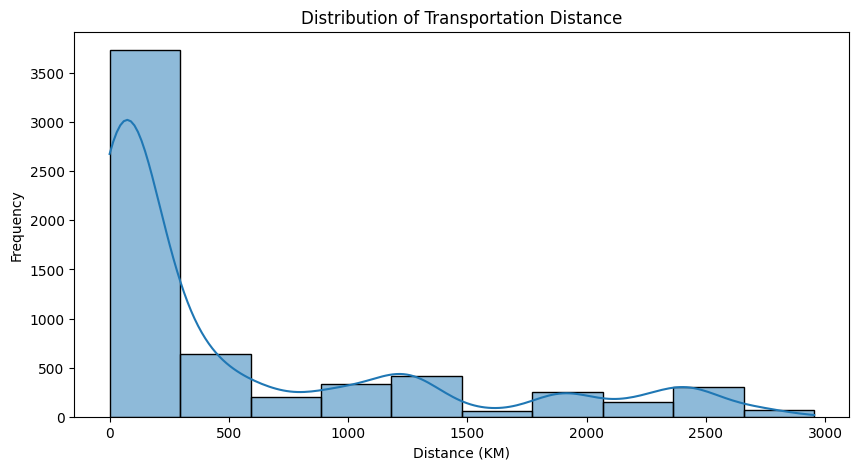

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of transportation distance
plt.figure(figsize=(10, 5))
sns.histplot(df['TRANSPORTATION_DISTANCE_IN_KM'], bins=10, kde=True)
plt.title('Distribution of Transportation Distance')
plt.xlabel('Distance (KM)')
plt.ylabel('Frequency')
plt.show()


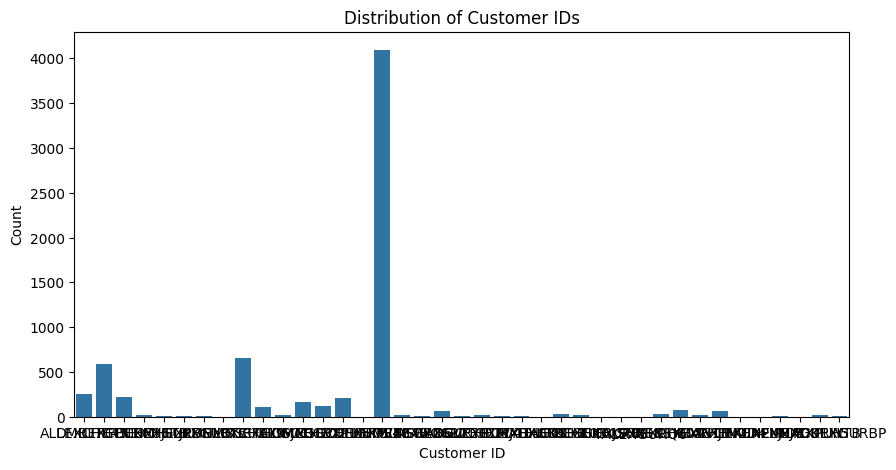

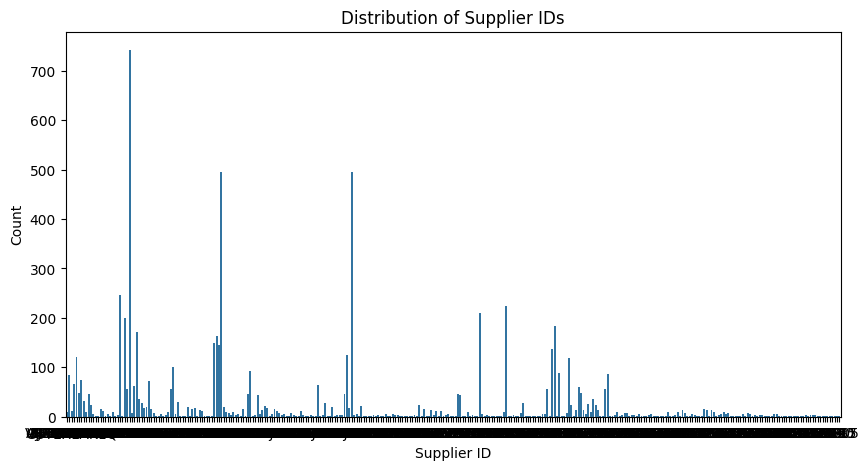

In [59]:
# Distribution of customerID
plt.figure(figsize=(10, 5))
sns.countplot(x='customerID', data=df)
plt.title('Distribution of Customer IDs')
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.show()

# Distribution of supplierID
plt.figure(figsize=(10, 5))
sns.countplot(x='supplierID', data=df)
plt.title('Distribution of Supplier IDs')
plt.xlabel('Supplier ID')
plt.ylabel('Count')
plt.show()


there seems to be a weak correlation bw customer and supplier frequency

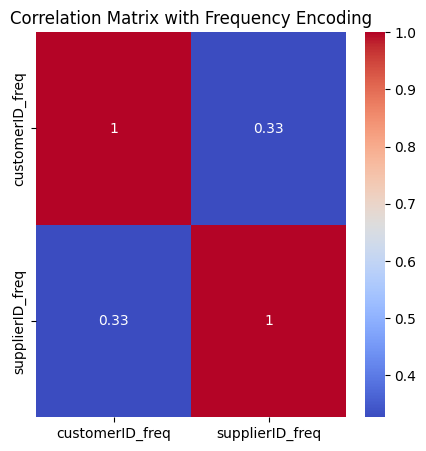

In [60]:
# Frequency encode the customerID and supplierID columns
customer_freq = df['customerID'].value_counts().to_dict()
supplier_freq = df['supplierID'].value_counts().to_dict()

df['customerID_freq'] = df['customerID'].map(customer_freq)
df['supplierID_freq'] = df['supplierID'].map(supplier_freq)

# Calculate the correlation between customerID and supplierID frequencies
correlation_matrix_freq = df[['customerID_freq', 'supplierID_freq']].corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix_freq, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Frequency Encoding')
plt.show()


In [61]:
df.head()

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped,customerID_freq,supplierID_freq
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE,251,10
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143,588,84
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO,222,11
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD,588,66
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT,222,120


In [62]:
df.loc[:,'trip_time'] = pd.to_datetime(df['actual_eta'])-df['trip_start_date']
df.loc[:,'trip_time_hours'] = df['trip_time'].apply(lambda x : x.total_seconds()/3600)
df.loc[:,'avg_speed'] = df['TRANSPORTATION_DISTANCE_IN_KM'] / df['trip_time_hours']


C:\Users\dayal\AppData\Local\Temp\ipykernel_15280\378190406.py:1: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  df.loc[:,'trip_time'] = pd.to_datetime(df['actual_eta'])-df['trip_start_date']


This is the bad data or outliers , these values would make it difficult to make any kind of meaningful analysis for trip performance or time based analysis as it can be seen that these rows have negative values for trip duration and arrival time is before departure time and that is not possible

Standard way of finding outliers is by checking the z_scores


In [72]:
df = df[df['avg_speed']>0].reset_index(drop=True)

In [64]:
df['Regular'] = df['Market/Regular ']

In [65]:
df.loc[:, 'ontime'] = df['ontime'].apply(lambda x: 1 if pd.isnull(x) else 0)
df.loc[:, 'delay'] = df['delay'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [66]:
df.loc[:,'Planned_ETA'] = pd.to_datetime(df['Planned_ETA'])
df.loc[:,'actual_eta'] = pd.to_datetime(df['actual_eta'])
df.loc[:,'actual_delay'] = df.loc[:,'actual_eta'] - df.loc[:,'Planned_ETA']

In [67]:
df.loc[:,'arrival_tag'] = df.loc[:,'actual_delay'].apply(lambda x: (
    'ontime' if pd.isnull(x) or (x.components.days == 0 and x.components.hours == 0)
    else ('delayed' if x < pd.Timedelta(0)
          else 'early' if x > pd.Timedelta(0)
          else 'unknown')
))
df.loc[:,'actual_delay'] = df.loc[:,'actual_eta'] - df.loc[:,'Planned_ETA']

In [71]:
df.columns

Index(['GpsProvider', 'BookingID', 'Market/Regular ', 'BookingID_Date',
       'vehicle_no', 'Origin_Location', 'Destination_Location', 'Org_lat_lon',
       'Des_lat_lon', 'Data_Ping_time', 'Planned_ETA', 'Current_Location',
       'DestinationLocation', 'actual_eta', 'Curr_lat', 'Curr_lon', 'ontime',
       'delay', 'OriginLocation_Code', 'DestinationLocation_Code',
       'trip_start_date', 'trip_end_date', 'TRANSPORTATION_DISTANCE_IN_KM',
       'vehicleType', 'Minimum_kms_to_be_covered_in_a_day', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'customerNameCode', 'supplierID',
       'supplierNameCode', 'Material Shipped', 'customerID_freq',
       'supplierID_freq', 'trip_time', 'trip_time_hours', 'avg_speed',
       'Regular', 'actual_delay', 'arrival_tag'],
      dtype='object')

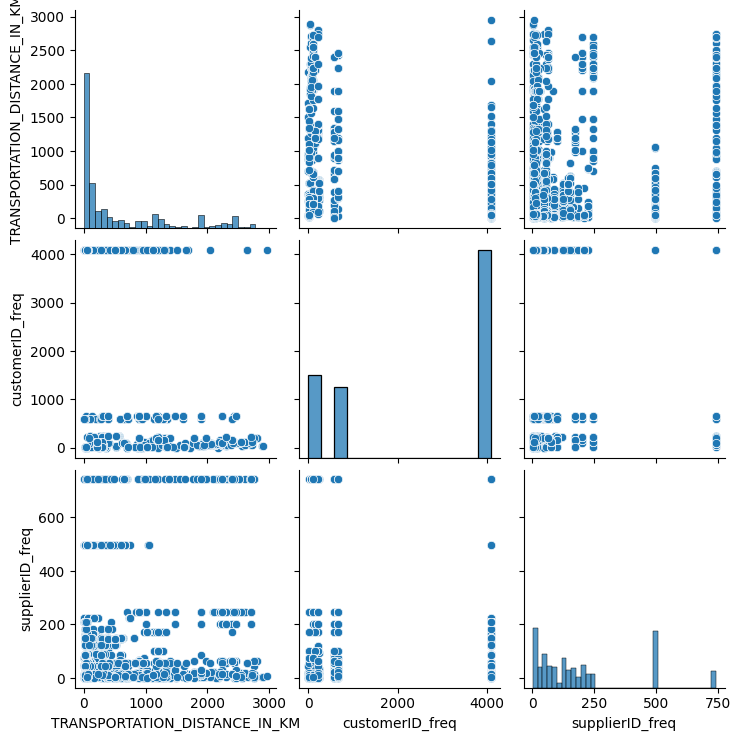

In [70]:
sns.pairplot(df[['TRANSPORTATION_DISTANCE_IN_KM','customerID_freq', 'supplierID_freq']])
plt.show()

In [ ]:
# Assuming you have a DataFrame called 'df' with relevant columns

# Count unique values in 'arrival_tag'
arrival_tag_counts = df['arrival_tag'].value_counts()

# Count occurrences of each value in 'ontime' and 'delay' columns
ontime_counts = df['ontime'].sum()
delay_counts = df['delay'].sum()

print("Arrival Tag Counts:")
print(arrival_tag_counts)
print("\nTotal On-Time Occurrences:", ontime_counts)
print("Total Delayed Occurrences:", delay_counts)


Arrival Tag Counts:
arrival_tag
early      4262
delayed    2556
ontime       62
Name: count, dtype: int64

Total On-Time Occurrences: 4332
Total Delayed Occurrences: 2538


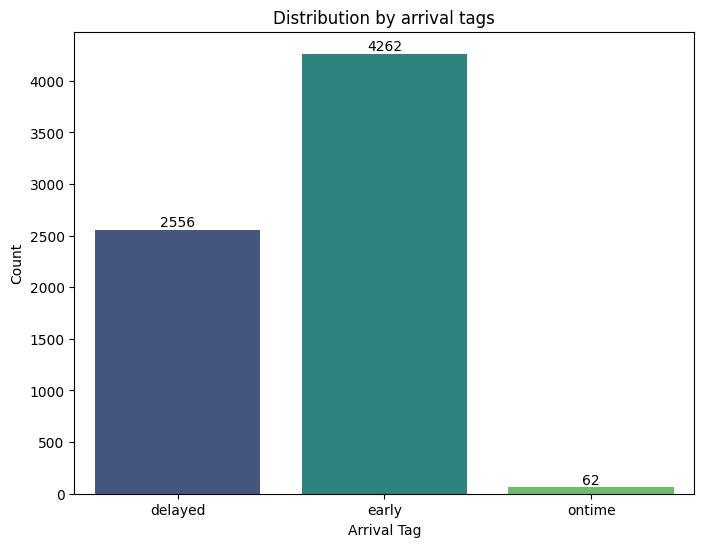

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  
ax = sns.countplot(x='arrival_tag', data=df, palette='viridis',hue='arrival_tag')

for p in ax.patches:
    height = p.get_height()

    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height+ 0.1),
                ha='center', va='bottom', color='black', fontsize=10)

# Add labels and title
plt.xlabel('Arrival Tag')
plt.ylabel('Count')
plt.title('Distribution by arrival tags')

plt.show()


In [ ]:
# Assuming you have a DataFrame called 'df' with relevant columns

# Group by 'supplierID', 'customerID', and 'arrival_tag', then count occurrences
grouped_counts = df.groupby(['supplierID', 'customerID', 'arrival_tag']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'arrival_tag' as columns
pivot_counts = grouped_counts.pivot_table(index=['supplierID', 'customerID'], columns='arrival_tag', values='Count', fill_value=0)

# Display the resulting DataFrame
print(pivot_counts.astype(int))


arrival_tag            delayed  early  ontime
supplierID customerID                        
777        FILEXCHE19        3      0       0
790        LTLEXMUM40        1      0       0
999        ALLEXCHE45        2      0       0
           BILGCCHE02        1      6       0
           DMREXCHEUX        1      2       1
...                        ...    ...     ...
VIJEXHOSR7 ALLEXCHE45        8      2       0
VIREXGURN1 HHMEXGURO6       10      0       0
VJLEXSHE09 DMREXCHEUX       82      1       0
           TMCGCCHE05        1      0       0
VRLEXENN11 ALLEXCHE45       27      3       1

[433 rows x 3 columns]


In [ ]:
df['supplierID'].unique().size

321

In [ ]:
customer_supplier_pairs = data.groupby(['customerID', 'supplierID']).size().reset_index(name='trip_count')

performance_metrics = data.groupby(['customerID', 'supplierID']).agg({
    'TRANSPORTATION_DISTANCE_IN_KM': 'mean',
    'Data_Ping_time': 'count'  
}).reset_index()

customer_supplier_analysis = pd.merge(customer_supplier_pairs, performance_metrics, on=['customerID', 'supplierID'])

customer_supplier_analysis.head()


,customerID,supplierID,trip_count,TRANSPORTATION_DISTANCE_IN_KM,Data_Ping_time
0,ALLEXCHE45,999,2,400.000000,2
1,ALLEXCHE45,2785,3,400.000000,3
2,ALLEXCHE45,6961,1,400.000000,1
3,ALLEXCHE45,67737,1,365.000000,1
4,ALLEXCHE45,67789,35,403.714286,35


Using exponential smoothening We can forecast demand for the next three months

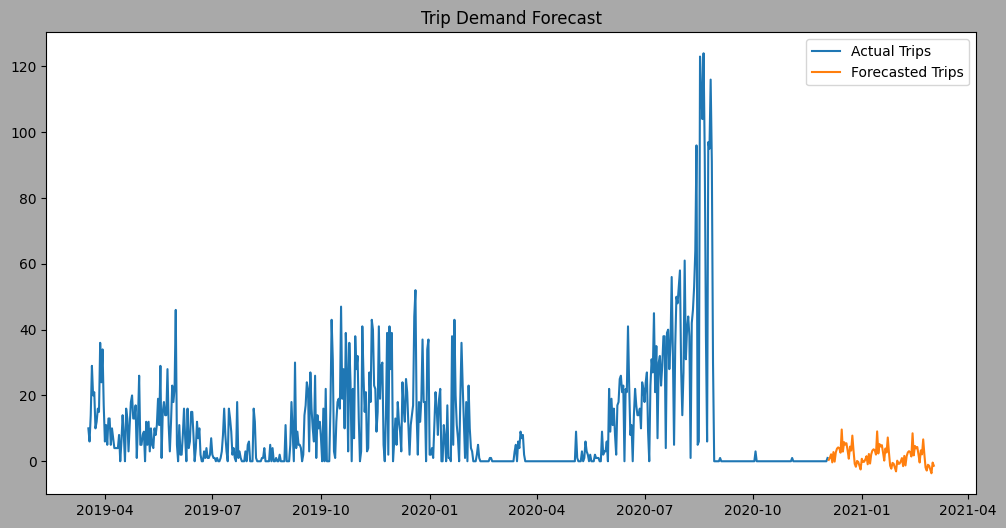

In [74]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Aggregate the number of trips by date
data['BookingID_Date'] = pd.to_datetime(data['BookingID_Date'])
trip_counts = data.set_index('BookingID_Date').resample('D').size().rename('trip_count')

model = ExponentialSmoothing(trip_counts, trend='add', seasonal='add', seasonal_periods=30)
fit = model.fit()

forecast = fit.forecast(90)
plt.figure(figsize=(12, 6),facecolor='darkgray')
plt.plot(trip_counts, label='Actual Trips')
plt.plot(forecast, label='Forecasted Trips')
plt.legend()
plt.title('Trip Demand Forecast')
plt.show()


We find outliers here using the standard way and highlight the outliers

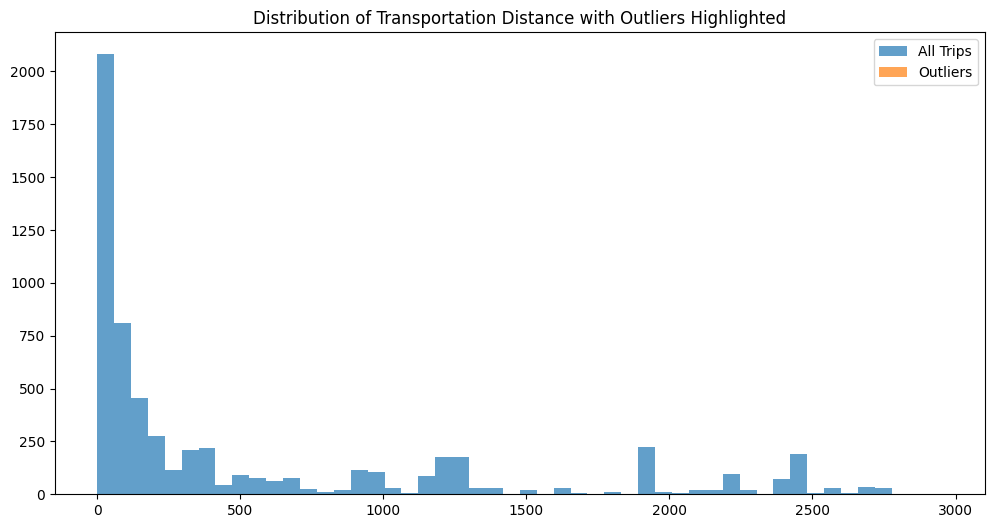

In [ ]:
import numpy as np

# Detect outliers using the Z-score method
data['distance_zscore'] = np.abs((data['TRANSPORTATION_DISTANCE_IN_KM'] - data['TRANSPORTATION_DISTANCE_IN_KM'].mean()) / data['TRANSPORTATION_DISTANCE_IN_KM'].std())

# Define a threshold for outliers (e.g., Z-score > 3)
outliers = data[data['distance_zscore'] > 3]

# Visualize outliers
plt.figure(figsize=(12, 6))
plt.hist(data['TRANSPORTATION_DISTANCE_IN_KM'], bins=50, alpha=0.7, label='All Trips')
plt.hist(outliers['TRANSPORTATION_DISTANCE_IN_KM'], bins=50, alpha=0.7, label='Outliers')
plt.legend()
plt.title('Distribution of Transportation Distance with Outliers Highlighted')
plt.show()


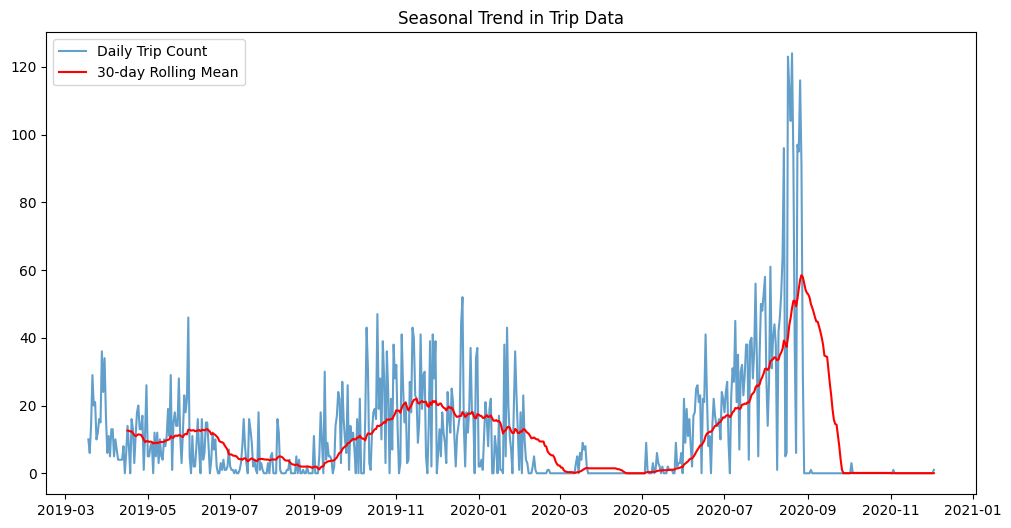

,TRANSPORTATION_DISTANCE_IN_KM,Data_Ping_time
TRANSPORTATION_DISTANCE_IN_KM,1.000000,0.148887
Data_Ping_time,0.148887,1.000000


In [ ]:
# Analyze the seasonal trend in trip data
seasonal_trend = trip_counts.rolling(window=30).mean()

# Plot the seasonal trend
plt.figure(figsize=(12, 6))
plt.plot(trip_counts, alpha=0.7, label='Daily Trip Count')
plt.plot(seasonal_trend, color='red', label='30-day Rolling Mean')
plt.legend()
plt.title('Seasonal Trend in Trip Data')
plt.show()

# Correlation analysis with other variables
correlations = data[['TRANSPORTATION_DISTANCE_IN_KM', 'Data_Ping_time']].corr()
correlations
